In [1]:
import pandas as pd
import numpy as np
import acquire
import acquire_rm
import explore
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
# Modeling
from sklearn.cluster import KMeans


In [2]:
#acquiring nba data
df = acquire.tome_prep()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84164 entries, 0 to 94709
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        84164 non-null  object 
 1   player_id     84164 non-null  int64  
 2   team          84164 non-null  object 
 3   team_id       84164 non-null  int64  
 4   game_id       84164 non-null  int64  
 5   home          84164 non-null  bool   
 6   period        84164 non-null  int64  
 7   abs_time      84164 non-null  int64  
 8   play_time     84164 non-null  float64
 9   since_rest    84164 non-null  float64
 10  loc_x         84164 non-null  int64  
 11  loc_y         84164 non-null  int64  
 12  zone          84164 non-null  object 
 13  shot_type     84164 non-null  object 
 14  score_margin  84164 non-null  int64  
 15  points        84164 non-null  int64  
 16  fg_pct        84164 non-null  float64
 17  shot_result   84164 non-null  object 
dtypes: bool(1), float64(3), in

In [4]:
df.head()

,player,player_id,team,team_id,game_id,home,period,abs_time,play_time,since_rest,loc_x,loc_y,zone,shot_type,score_margin,points,fg_pct,shot_result
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,226,226.0,226.0,228,64,R Below Break/Corner,Jump Shot,-3,3,1.00,Made Shot
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,253,253.0,253.0,91,232,R Above Break,Jump Shot,0,6,1.00,Made Shot
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1580,867.0,140.0,228,69,R Below Break/Corner,Jump Shot,11,9,0.67,Made Shot
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1896,1183.0,456.0,134,210,R Above Break,Jump Shot,18,9,0.75,Missed Shot
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,4,2411,1308.0,19.0,-148,203,Center,Jump Shot,23,9,0.50,Missed Shot


In [5]:
df_players = df.groupby(["player"])

In [6]:
df_players.head()

,player,player_id,team,team_id,game_id,home,period,abs_time,play_time,since_rest,loc_x,loc_y,zone,shot_type,score_margin,points,fg_pct,shot_result
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,226,226.0,226.0,228,64,R Below Break/Corner,Jump Shot,-3,3,1.00,Made Shot
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,253,253.0,253.0,91,232,R Above Break,Jump Shot,0,6,1.00,Made Shot
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1580,867.0,140.0,228,69,R Below Break/Corner,Jump Shot,11,9,0.67,Made Shot
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1896,1183.0,456.0,134,210,R Above Break,Jump Shot,18,9,0.75,Missed Shot
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,4,2411,1308.0,19.0,-148,203,Center,Jump Shot,23,9,0.50,Missed Shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94024,Terry Rozier,1626179,Charlotte Hornets,1610612766,22100017,False,1,258,258.0,258.0,168,197,L Below Break/Corner,Pullup Jump shot,-1,0,1.00,Missed Shot
94025,Terry Rozier,1626179,Charlotte Hornets,1610612766,22100017,False,2,1139,694.0,162.0,126,219,R Above Break,Jump Shot,-8,0,0.00,Missed Shot
94026,Terry Rozier,1626179,Charlotte Hornets,1610612766,22100090,True,1,158,158.0,158.0,-235,-4,R Center,Jump Shot,-1,3,1.00,Made Shot
94027,Terry Rozier,1626179,Charlotte Hornets,1610612766,22100090,True,1,180,180.0,180.0,-229,18,R Center,Jump Shot,-1,3,1.00,Missed Shot


array([[<AxesSubplot:title={'center':'player_id'}>,
        <AxesSubplot:title={'center':'team_id'}>,
        <AxesSubplot:title={'center':'game_id'}>],
       [<AxesSubplot:title={'center':'period'}>,
        <AxesSubplot:title={'center':'abs_time'}>,
        <AxesSubplot:title={'center':'play_time'}>],
       [<AxesSubplot:title={'center':'since_rest'}>,
        <AxesSubplot:title={'center':'loc_x'}>,
        <AxesSubplot:title={'center':'loc_y'}>],
       [<AxesSubplot:title={'center':'score_margin'}>,
        <AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'fg_pct'}>]], dtype=object)

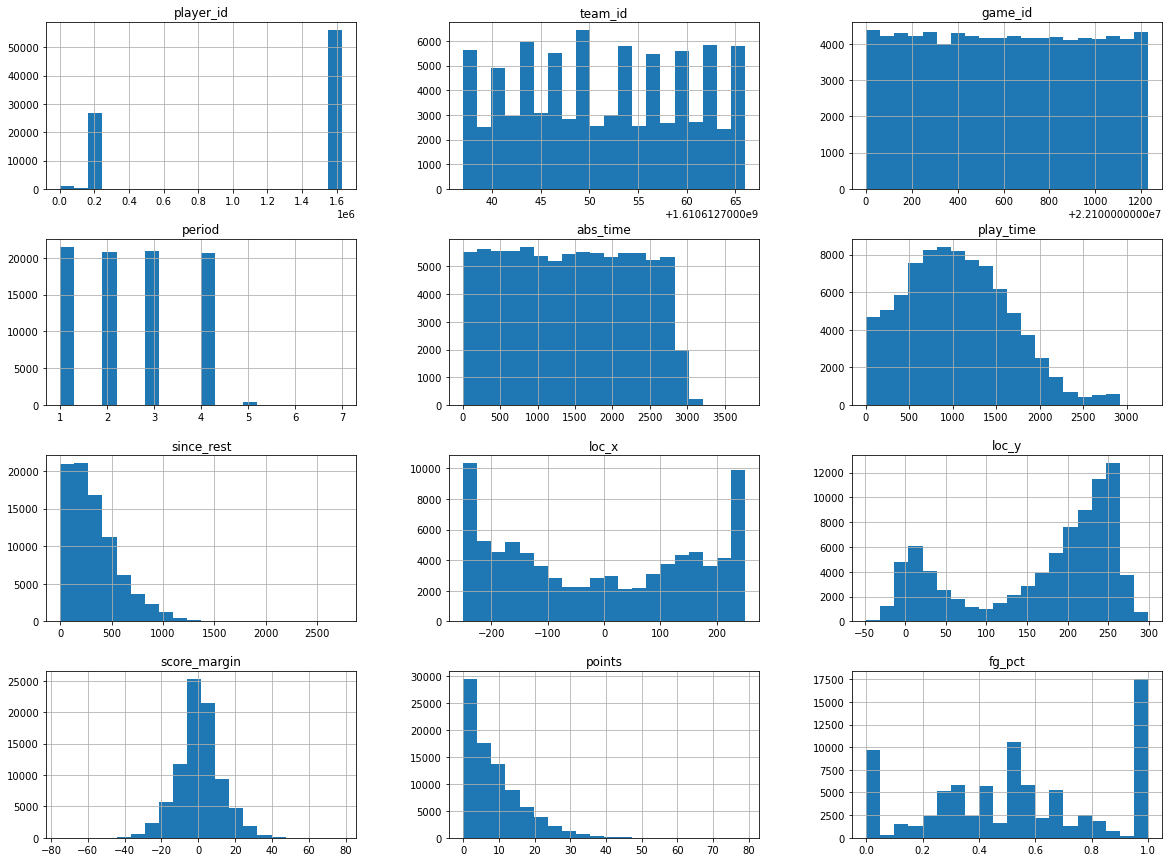

In [7]:
df.hist(bins = 20,figsize =  (20,15))


In [8]:
df_main = pd.read_csv("3pt_maindf.csv")
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86535 entries, 0 to 86534
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            86535 non-null  object
 1   GAME_ID              86535 non-null  int64 
 2   GAME_EVENT_ID        86535 non-null  int64 
 3   PLAYER_ID            86535 non-null  int64 
 4   PLAYER_NAME          86535 non-null  object
 5   TEAM_ID              86535 non-null  int64 
 6   TEAM_NAME            86535 non-null  object
 7   PERIOD               86535 non-null  int64 
 8   MINUTES_REMAINING    86535 non-null  int64 
 9   SECONDS_REMAINING    86535 non-null  int64 
 10  EVENT_TYPE           86535 non-null  object
 11  ACTION_TYPE          86535 non-null  object
 12  SHOT_TYPE            86535 non-null  object
 13  SHOT_ZONE_BASIC      86535 non-null  object
 14  SHOT_ZONE_AREA       86535 non-null  object
 15  SHOT_ZONE_RANGE      86535 non-null  object
 16  SHOT

In [9]:
df_main.columns = df_main.columns.str.lower()

In [11]:
# game event id, shot zone 

In [12]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86535 entries, 0 to 86534
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grid_type            86535 non-null  object
 1   game_id              86535 non-null  int64 
 2   game_event_id        86535 non-null  int64 
 3   player_id            86535 non-null  int64 
 4   player_name          86535 non-null  object
 5   team_id              86535 non-null  int64 
 6   team_name            86535 non-null  object
 7   period               86535 non-null  int64 
 8   minutes_remaining    86535 non-null  int64 
 9   seconds_remaining    86535 non-null  int64 
 10  event_type           86535 non-null  object
 11  action_type          86535 non-null  object
 12  shot_type            86535 non-null  object
 13  shot_zone_basic      86535 non-null  object
 14  shot_zone_area       86535 non-null  object
 15  shot_zone_range      86535 non-null  object
 16  shot

In [13]:
df_merge = df_main[["game_id","game_event_id","player_id"]]

In [14]:
# grouping by player name
df_trial = df_main.groupby(["player_name"])

In [91]:
df_main.shot_zone

0         Left Side Center(LC)
1                    Center(C)
2         Left Side Center(LC)
3                    Center(C)
4                    Center(C)
                 ...          
86530    Right Side Center(RC)
86531    Right Side Center(RC)
86532             Left Side(L)
86533            Right Side(R)
86534            Right Side(R)
Name: shot_zone_area, Length: 86535, dtype: object

In [15]:
df_trial.head()

,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,seconds_remaining,...,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm
0,Shot Chart Detail,22100001,7,1628960,Grayson Allen,1610612749,Milwaukee Bucks,1,11,42,...,Left Side Center(LC),24+ ft.,26,-164,210,1,0,20211019,MIL,BKN
1,Shot Chart Detail,22100001,15,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,11,13,...,Center(C),24+ ft.,26,0,263,1,0,20211019,MIL,BKN
2,Shot Chart Detail,22100001,25,201935,James Harden,1610612751,Brooklyn Nets,1,10,16,...,Left Side Center(LC),24+ ft.,27,-213,172,1,0,20211019,MIL,BKN
3,Shot Chart Detail,22100001,27,201572,Brook Lopez,1610612749,Milwaukee Bucks,1,10,3,...,Center(C),24+ ft.,28,23,282,1,1,20211019,MIL,BKN
4,Shot Chart Detail,22100001,43,203114,Khris Middleton,1610612749,Milwaukee Bucks,1,8,52,...,Center(C),24+ ft.,26,-54,261,1,1,20211019,MIL,BKN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86012,Shot Chart Detail,22101223,662,1630346,Matt Ryan,1610612738,Boston Celtics,4,1,8,...,Left Side(L),24+ ft.,23,-234,16,1,0,20220410,MEM,BOS
86013,Shot Chart Detail,22101223,672,1630346,Matt Ryan,1610612738,Boston Celtics,4,0,35,...,Left Side(L),24+ ft.,24,-237,73,1,1,20220410,MEM,BOS
86248,Shot Chart Detail,22101227,129,2617,Udonis Haslem,1610612748,Miami Heat,1,1,18,...,Center(C),24+ ft.,27,-70,270,1,0,20220410,ORL,MIA
86412,Shot Chart Detail,22101229,173,1630994,Gabriel Lundberg,1610612756,Phoenix Suns,2,10,32,...,Center(C),24+ ft.,25,66,248,1,0,20220410,PHX,SAC


In [16]:
df_gb = df_main.groupby(["player_name", "game_id"]).agg({"shot_attempted_flag":["sum"],"shot_made_flag":["sum"]})
# grouped_multiple = df.groupby(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max']})
df_gb["shot_pct"] = df_gb.shot_made_flag/df_gb.shot_attempted_flag

In [17]:
df_gb = df_gb.reset_index()
df_gb = df_gb.droplevel(1, axis=1) 
# df_gb.rename(columns = {0:"player",1:"game_id",2:"shots_attempt",3:"shots_made",4:"shot_pct"})

In [18]:
df_gb.rename(columns = {"player_name":"player"}, inplace= True)

In [19]:
df_gb.head()

,player,game_id,shot_attempted_flag,shot_made_flag,shot_pct
0,Aaron Gordon,22100012,1,1,1.0
1,Aaron Gordon,22100024,1,0,0.0
2,Aaron Gordon,22100048,5,1,0.2
3,Aaron Gordon,22100054,3,0,0.0
4,Aaron Gordon,22100075,2,1,0.5


In [20]:
# new_df = df.join(df_gb, on = "game_id" )
new_df = pd.merge(df, df_gb, on=['player','game_id'], how='inner')

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84143 entries, 0 to 84142
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               84143 non-null  object 
 1   player_id            84143 non-null  int64  
 2   team                 84143 non-null  object 
 3   team_id              84143 non-null  int64  
 4   game_id              84143 non-null  int64  
 5   home                 84143 non-null  bool   
 6   period               84143 non-null  int64  
 7   abs_time             84143 non-null  int64  
 8   play_time            84143 non-null  float64
 9   since_rest           84143 non-null  float64
 10  loc_x                84143 non-null  int64  
 11  loc_y                84143 non-null  int64  
 12  zone                 84143 non-null  object 
 13  shot_type            84143 non-null  object 
 14  score_margin         84143 non-null  int64  
 15  points               84143 non-null 

In [22]:
# shots attempted, play time 
new_df['shooter_bin'] = pd.cut(new_df.shot_attempted_flag, bins = [0, 4, 10, 15, 21], labels = ['0-4 shots', '5-9 shots', '10-14 shots','15-20 shots']) # creating age bins 
new_df["minutes_bin"] = pd.cut(new_df.play_time, bins = [0, 400, 1000, 1500, 1999, 3000], labels = ['below 400 minutes', '400-1000 minutes', '1000-1500 minutes','1500-2000 minutes', '2000 to 3000 minutes'])


<AxesSubplot:>

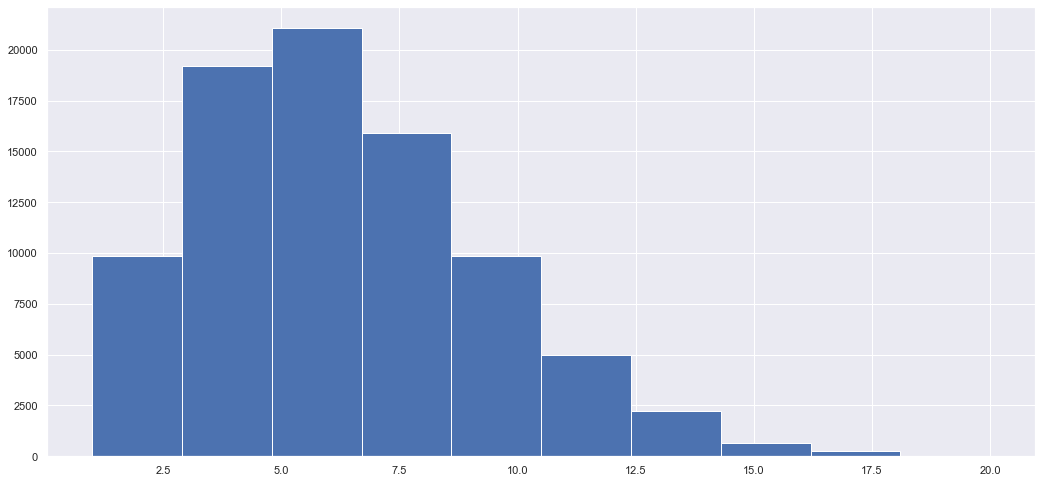

In [94]:
new_df.shot_attempted_flag.hist()

In [23]:
from re import T
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def splitter(df, target = 'None', train_split_1 = .8, train_split_2 = .7, random_state = 123):
    '''
    Splits a dataset into train, validate and test dataframes.
    Optional target, with default splits of 56% 'Train' (80% * 70%), 20% 'Test', 24% Validate (80% * 30%)
    Defailt random seed/state of 123
    '''
    if target == 'None':
        train, test = train_test_split(df, train_size = train_split_1, random_state = random_state)
        train, validate = train_test_split(train, train_size = train_split_2, random_state = random_state)
        print(f'Train = {train.shape[0]} rows ({100*(train_split_1*train_split_2):.1f}%) | Validate = {validate.shape[0]} rows ({100*(train_split_1*(1-train_split_2)):.1f}%) | Test = {test.shape[0]} rows ({100*(1-train_split_1):.1f}%)')
        print('You did not stratify.  If looking to stratify, ensure to add argument: "target = variable to stratify on".')
        return train, validate, test
    else: 
        train, test = train_test_split(df, train_size = train_split_1, random_state = random_state, stratify = df[target])
        train, validate = train_test_split(train, train_size = train_split_2, random_state = random_state, stratify = train[target])
        print(f'Train = {train.shape[0]} rows ({100*(train_split_1*train_split_2):.1f}%) | Validate = {validate.shape[0]} rows ({100*(train_split_1*(1-train_split_2)):.1f}%) | Test = {test.shape[0]} rows ({100*(1-train_split_1):.1f}%)')
        return train, validate, test       


In [24]:
#split data 
train, validate, test = splitter(new_df)

Train = 47119 rows (56.0%) | Validate = 20195 rows (24.0%) | Test = 16829 rows (20.0%)
You did not stratify.  If looking to stratify, ensure to add argument: "target = variable to stratify on".


In [25]:

# charting_num.columns


In [26]:
# for i, predictor in enumerate(charting_num.columns):
#     plt.figure(i)
#     plot= sns.relplot(data=train, x=predictor, hue='shot_result')
# #     sns.set(rc={'figure.figsize':(17.7,8.27)})
# #     plt.setp(plot.get_xticklabels(), rotation=45) 

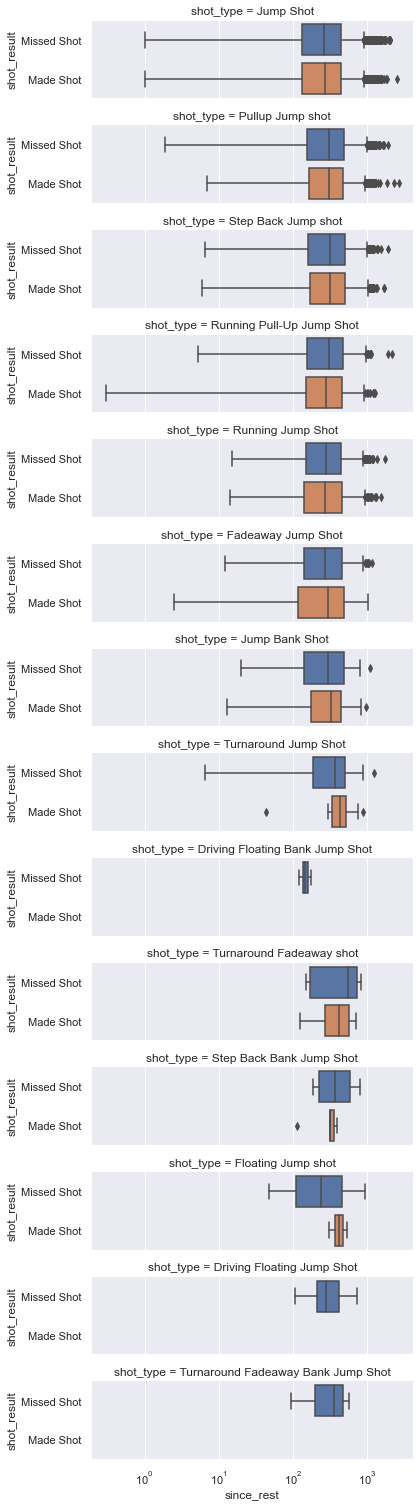

In [95]:
g = sns.catplot(x="since_rest", y="shot_result", row="shot_type",
                kind="box", orient="h", height=1.5, aspect=4,
                data=train)
g.set(xscale="log")

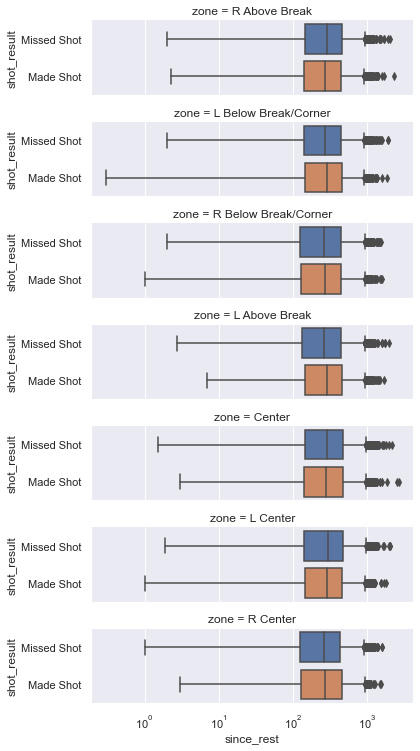

In [105]:
g = sns.catplot(x="since_rest", y="shot_result", row="zone",
                kind="box", orient="h", height=1.5, aspect=4,
                data=train)
g.set(xscale="log")

In [92]:

def plot_categorical():
    numerical_cols = train[['player','player_id', 'team_id', 'game_id', 'period', 'abs_time', 'play_time',
       'since_rest', 'loc_x', 'loc_y', 'score_margin', 'points', 'fg_pct',
       'shot_attempted_flag', 'shot_made_flag', 'shot_pct']]
    for i, predictor in enumerate(train.drop(columns = numerical_cols.columns )):
        plt.figure(i)
        plot= sns.countplot(data=train, x=predictor, hue='shot_result')
        sns.set(rc={'figure.figsize':(17.7,8.27)})
        plt.setp(plot.get_xticklabels(), rotation=45) 
    return plot

<AxesSubplot:xlabel='quarters', ylabel='count'>

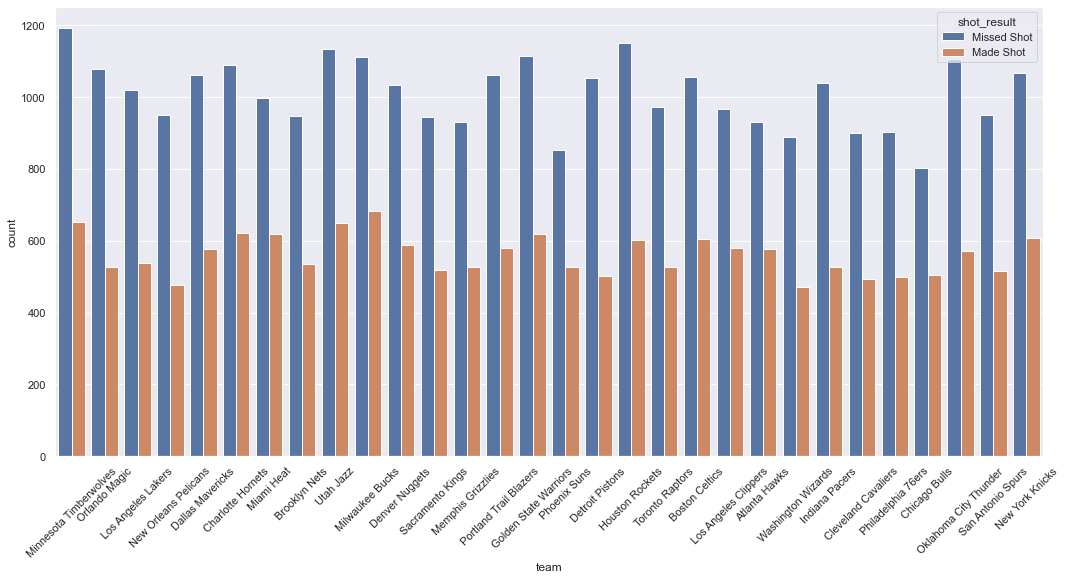

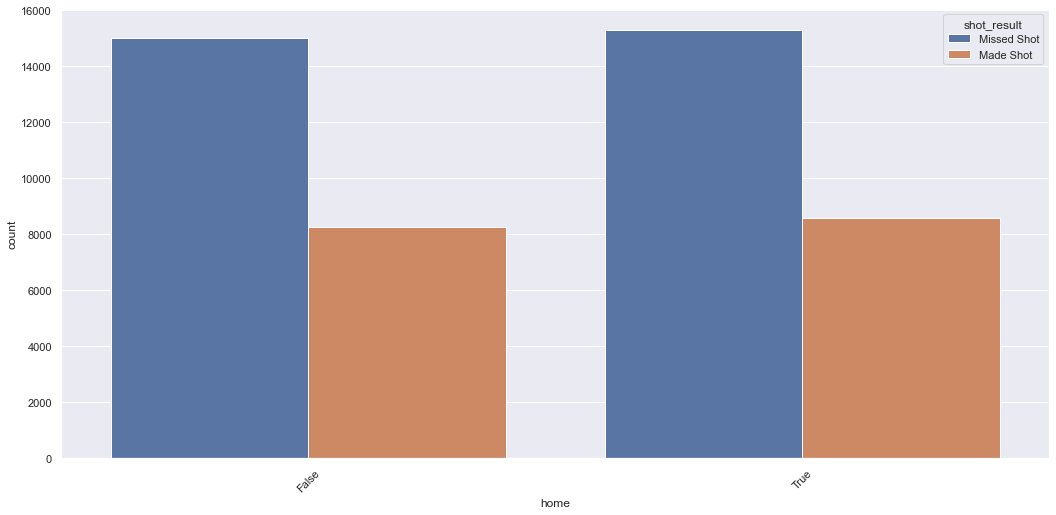

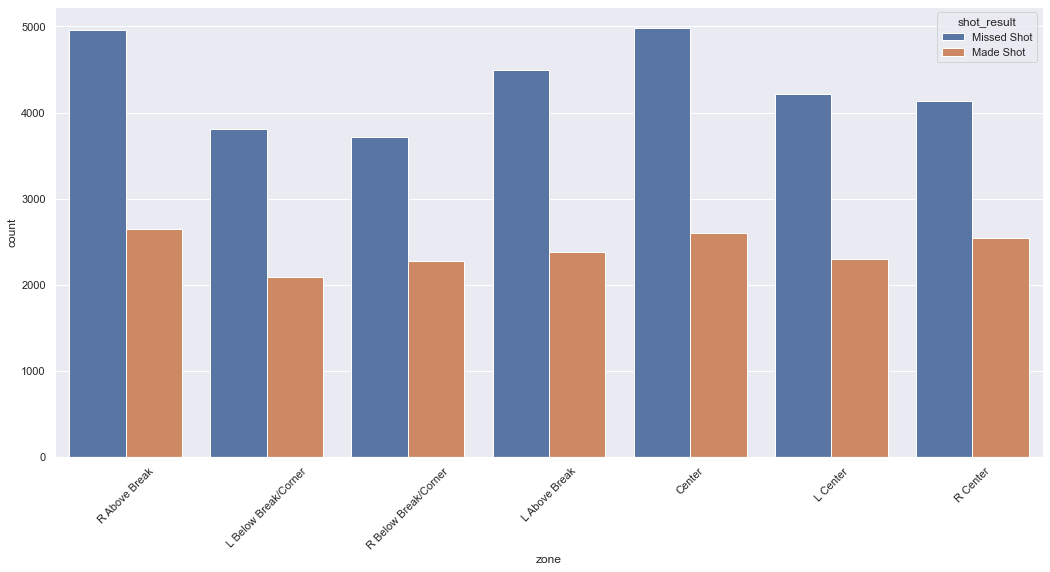

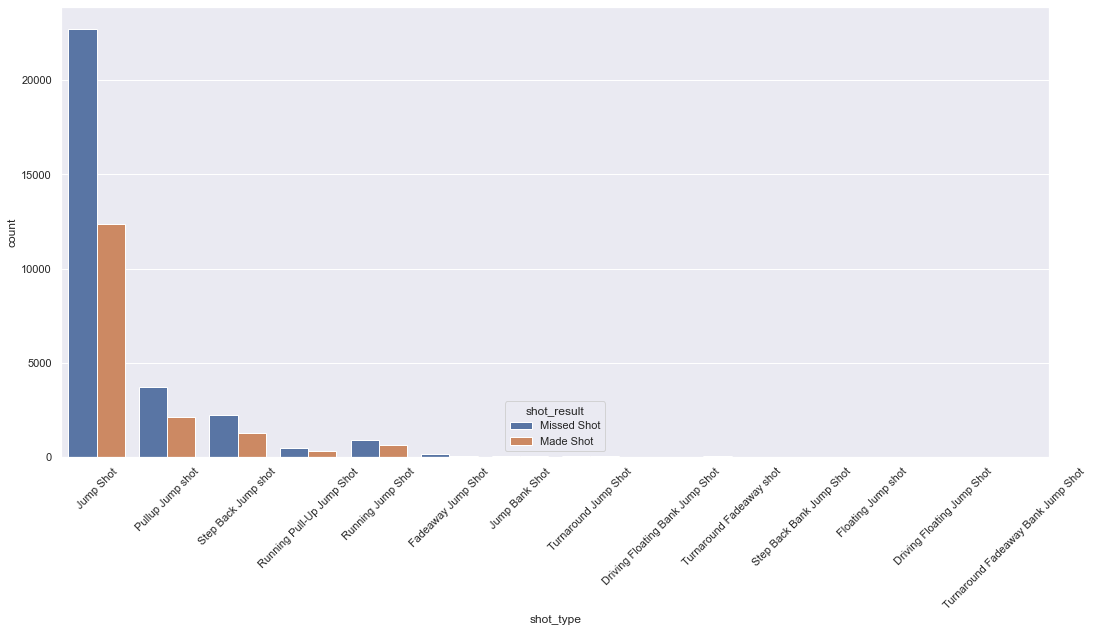

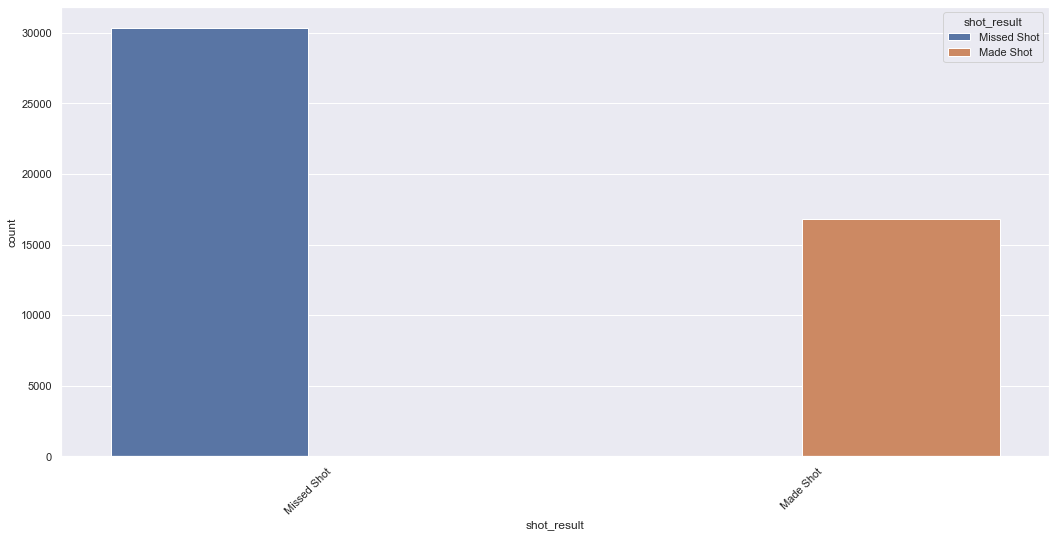

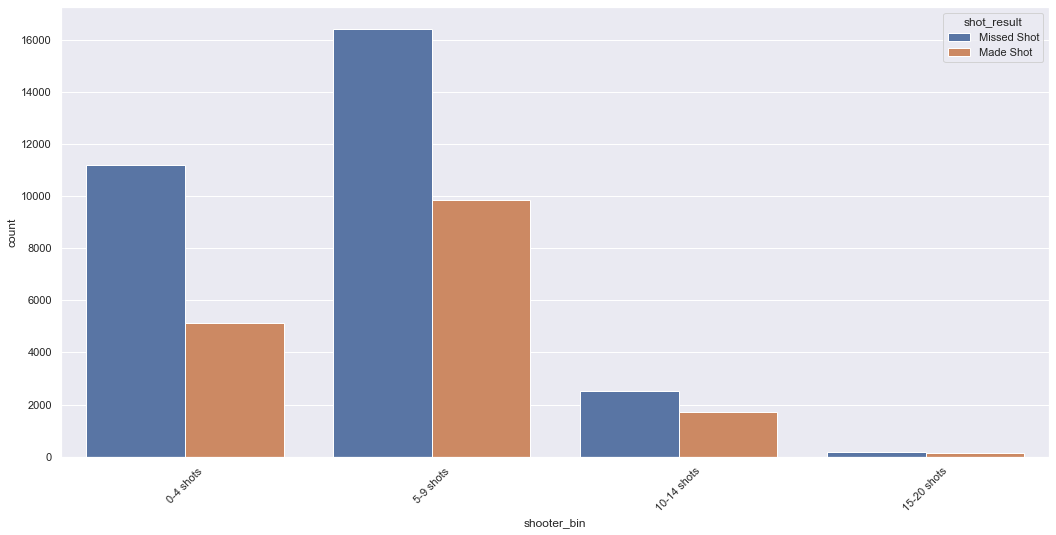

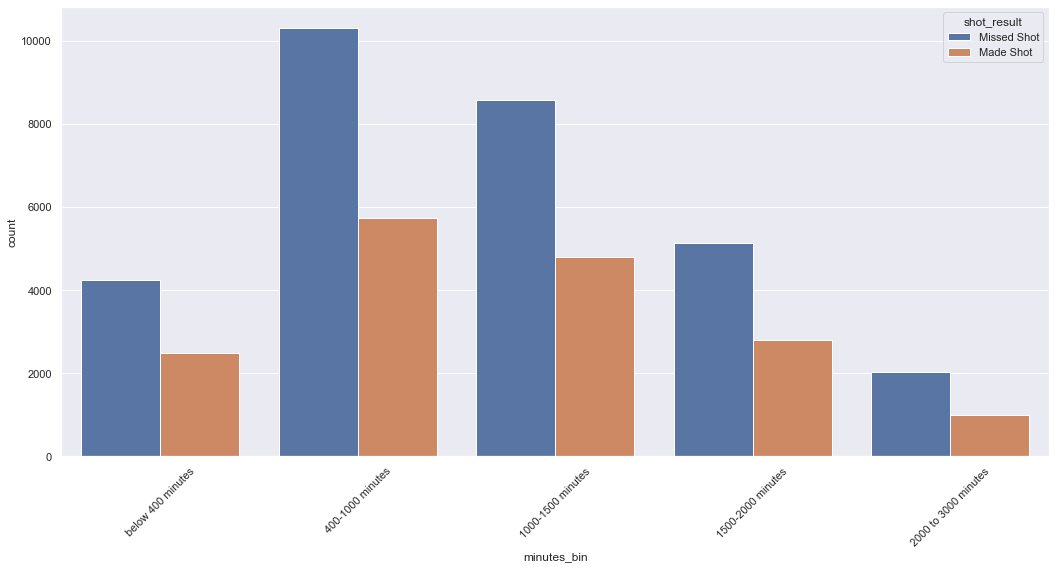

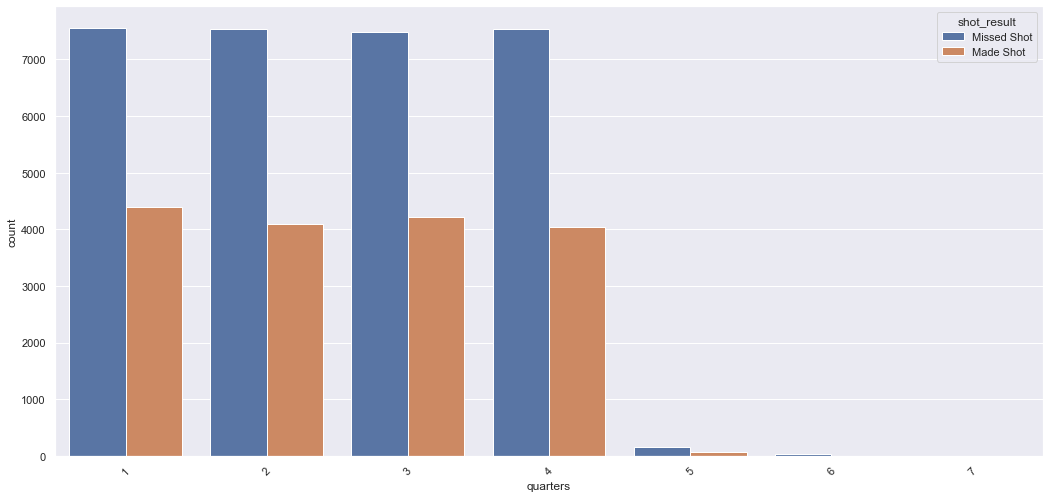

In [93]:
plot_categorical()

In [30]:
# for i, predictor in enumerate(df_players(columns = newdf.columns )):
#     plt.figure(i)
#     plot= sns.countplot(data=df, x=predictor, hue='shot_result')
#     sns.set(rc={'figure.figsize':(17.7,8.27)})
#     plt.setp(plot.get_xticklabels(), rotation=45)

## function

In [31]:
# charting_num = train.select_dtypes(include=numerics)
def plot_numerical():
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for i, predictor in enumerate(train.select_dtypes(include= numerics)):
        plt.figure(i)
        plot= sns.relplot(data=train, y=predictor, x='since_rest')
        sns.set(rc={'figure.figsize':(17.7,8.27)})
        return plot

#     plt.setp(plot.get_xticklabels(), rotation=45)

In [97]:
def plot_shot_location_bin():
    plt.figure(figsize=(14,10))
    sns.scatterplot(x='loc_x', y='loc_y', hue=train.shooter_bin, data=train)
    return plt

In [33]:
steph = train[train["player"]=="Stephen Curry"]

In [ ]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='loc_x', y='loc_y', hue=train.shooter_bin, data=train)
    

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

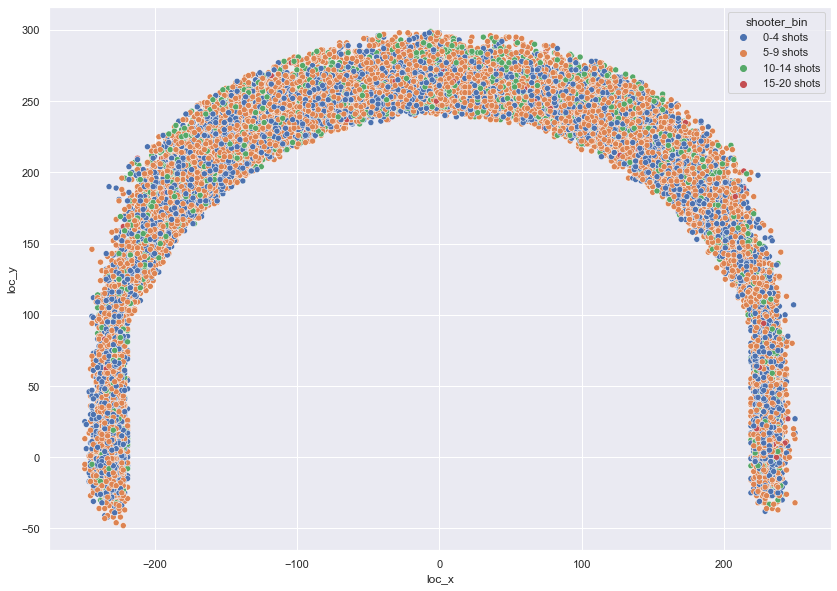

In [98]:
plot_shot_location_bin()

In [35]:
def plot_binned_minutes_shots():   
    plt.figure(figsize=(14,10))
    sns.scatterplot(x='loc_x', y='loc_y', hue=train.minutes_bin, data=train.sample(100))
    return plot

<AxesSubplot:xlabel='loc_x', ylabel='loc_y'>

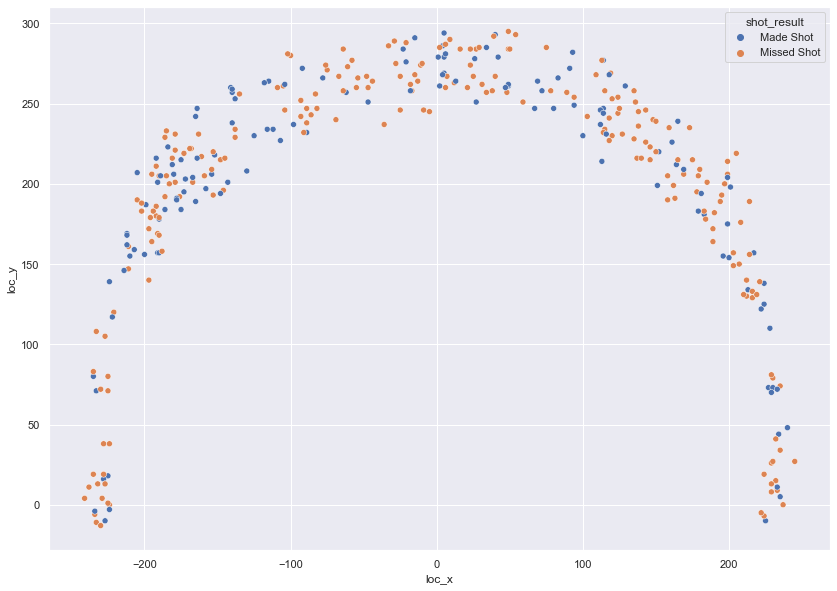

In [36]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='loc_x', y='loc_y', hue=train.shot_result, data=steph)


In [37]:
df_trial = df_main.groupby(["player_name"])

In [38]:
train.columns

Index(['player', 'player_id', 'team', 'team_id', 'game_id', 'home', 'period',
       'abs_time', 'play_time', 'since_rest', 'loc_x', 'loc_y', 'zone',
       'shot_type', 'score_margin', 'points', 'fg_pct', 'shot_result',
       'shot_attempted_flag', 'shot_made_flag', 'shot_pct', 'shooter_bin',
       'minutes_bin'],
      dtype='object')

In [39]:
charting_cols= ['team', 'home', 'period', 'zone','shot_type', 'score_margin', 'fg_pct', 'shot_result',
       'shot_attempted_flag', 'shot_made_flag', 'shot_pct', 'shooter_bin',
       'minutes_bin']

In [40]:
def plot_categorical_box_plot():
    target = train.shot_pct
    train_cat = train[['team', 'period', 'zone','shot_type', 'score_margin', 'shooter_bin','minutes_bin']]
    #  use a for loop to boxplot my independent variables against our dependent one:
    for col in train_cat:
        sns.boxplot(x=train_cat[col], y=target, data=train_cat)
        plt.ylabel('shot_pct')
        plt.xlabel(col)
        plt.legend()
        plt.tight_layout()
        plt.show()
    return plot

In [41]:
def plot_categorical_stir_plot():
    target = train.shot_pct
    train_cat = train[['team', 'period', 'zone','shot_type', 'score_margin', 'shooter_bin','minutes_bin']]
    #  use a for loop to boxplot my independent variables against our dependent one:
    for col in train_cat:
        sns.stripplot(x=train_cat[col], y=target, data=train_cat)
        plt.ylabel('shot_pct')
        plt.xlabel(col)
        plt.legend()
        plt.tight_layout()
        plt.show()
    return plot

In [42]:
df.head()

,player,player_id,team,team_id,game_id,home,period,abs_time,play_time,since_rest,loc_x,loc_y,zone,shot_type,score_margin,points,fg_pct,shot_result
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,226,226.0,226.0,228,64,R Below Break/Corner,Jump Shot,-3,3,1.00,Made Shot
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,253,253.0,253.0,91,232,R Above Break,Jump Shot,0,6,1.00,Made Shot
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1580,867.0,140.0,228,69,R Below Break/Corner,Jump Shot,11,9,0.67,Made Shot
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1896,1183.0,456.0,134,210,R Above Break,Jump Shot,18,9,0.75,Missed Shot
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,4,2411,1308.0,19.0,-148,203,Center,Jump Shot,23,9,0.50,Missed Shot


In [43]:
# X= df[["play_time"]]
# # def cluster_features(df, k):
# kmeans = KMeans(n_clusters =4, random_state=347)

# #group1 = train_scaled[['age','price_bath','taxvaluedollarcnt_zone','taxvaluedollarcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet','price_sqft']]
# kmeans.fit(X)
# kmeans.predict(X)
# train_scaled['regional_prices_clusters'] = kmeans.predict(X)
# plt.figure(figsize=(10, 6))
# plt.axvline(x=0.5, color='k', linestyle='--')
# sns.scatterplot(x = 'logerror', y = 'taxvaluedollarcnt_zone', data = train_scaled, hue = 'regional_prices_clusters')

In [44]:
# # encoding 
# obj_df = train.select_dtypes(include=['object', 'category','bool']).copy()
# obj_df.head()


In [45]:
train["quarters"] = train["period"].astype('category')
train.dtypes

player                   object
player_id                 int64
team                     object
team_id                   int64
game_id                   int64
home                       bool
period                    int64
abs_time                  int64
play_time               float64
since_rest              float64
loc_x                     int64
loc_y                     int64
zone                     object
shot_type                object
score_margin              int64
points                    int64
fg_pct                  float64
shot_result              object
shot_attempted_flag       int64
shot_made_flag            int64
shot_pct                float64
shooter_bin            category
minutes_bin            category
quarters               category
dtype: object

In [46]:
encoded_train = pd.get_dummies(train, columns=["home", "zone","shot_type", "shooter_bin", "minutes_bin"])
encoded_validate = pd.get_dummies(validate, columns=["home", "zone","shot_type", "shooter_bin", "minutes_bin"])
encoded_test = pd.get_dummies(test, columns=["home", "zone","shot_type", "shooter_bin", "minutes_bin"])

# enc = ["home", "zone","shot_type","shot_result", "shooter_bin", "minutes_bin"]
# ohe = OneHotEncoder(categories=enc, handle_unknown='ignore', sparse=False)]


In [47]:
def encoding_split_data(train, validate, test, cols):  
    encoded_train = pd.get_dummies(train, columns=cols)
    encoded_validate = pd.get_dummies(validate, columns=cols)
    encoded_test = pd.get_dummies(test, columns=cols)
    return train_encoded, validate_encoded, test_encoded


In [48]:
# cols = (["home", "zone","shot_type", "shooter_bin", "minutes_bin"])
# a,b,c = encoding_split_data(train, validate, test,cols)
# a.head()

In [86]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84143 entries, 0 to 84142
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   player               84143 non-null  object  
 1   player_id            84143 non-null  int64   
 2   team                 84143 non-null  object  
 3   team_id              84143 non-null  int64   
 4   game_id              84143 non-null  int64   
 5   home                 84143 non-null  bool    
 6   period               84143 non-null  int64   
 7   abs_time             84143 non-null  int64   
 8   play_time            84143 non-null  float64 
 9   since_rest           84143 non-null  float64 
 10  loc_x                84143 non-null  int64   
 11  loc_y                84143 non-null  int64   
 12  zone                 84143 non-null  object  
 13  shot_type            84143 non-null  object  
 14  score_margin         84143 non-null  int64   
 15  points             

In [49]:
encoded_df = pd.get_dummies(new_df, columns=["home", "zone","shot_type","shot_result", "shooter_bin", "minutes_bin"])
encoded_df.to_csv("encoded_df.csv",index = 0)

In [85]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84143 entries, 0 to 84142
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   player                                        84143 non-null  object 
 1   player_id                                     84143 non-null  int64  
 2   team                                          84143 non-null  object 
 3   team_id                                       84143 non-null  int64  
 4   game_id                                       84143 non-null  int64  
 5   period                                        84143 non-null  int64  
 6   abs_time                                      84143 non-null  int64  
 7   play_time                                     84143 non-null  float64
 8   since_rest                                    84143 non-null  float64
 9   loc_x                                         84143 non-null 

In [50]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84143 entries, 0 to 84142
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   player                                        84143 non-null  object 
 1   player_id                                     84143 non-null  int64  
 2   team                                          84143 non-null  object 
 3   team_id                                       84143 non-null  int64  
 4   game_id                                       84143 non-null  int64  
 5   period                                        84143 non-null  int64  
 6   abs_time                                      84143 non-null  int64  
 7   play_time                                     84143 non-null  float64
 8   since_rest                                    84143 non-null  float64
 9   loc_x                                         84143 non-null 

In [51]:
# encoded_df.to_csv("encoded_data.csv", index = 0)

In [52]:
ryans_df = pd.read_csv("season_3pt_scores.csv")

In [53]:
ryans_df.columns

Index(['player', 'game_id', 'made_threes', 'game_three_pct',
       'per_game_3p_misses', 'per_game_3pa', 'three_score_v1',
       'three_score_v2', 'three_score_v3', 'made_threes_rank',
       'game_three_pct_rank', 'per_game_3p_misses_rank', 'per_game_3pa_rank',
       'three_score_v1_rank', 'three_score_v2_rank', 'three_score_v3_rank'],
      dtype='object')

In [54]:
ryans_df.columns

Index(['player', 'game_id', 'made_threes', 'game_three_pct',
       'per_game_3p_misses', 'per_game_3pa', 'three_score_v1',
       'three_score_v2', 'three_score_v3', 'made_threes_rank',
       'game_three_pct_rank', 'per_game_3p_misses_rank', 'per_game_3pa_rank',
       'three_score_v1_rank', 'three_score_v2_rank', 'three_score_v3_rank'],
      dtype='object')

In [55]:
complete_df = pd.merge(encoded_df,ryans_df, on = ["player"], how = "inner")


In [56]:
# # using kmeans
# import numpy as np
# from sklearn.feature_selection import SelectKBest, f_classif

# predictors = ['period','abs_time', 'play_time', 'since_rest', 'score_margin', 'points', 'fg_pct','shot_attempted_flag', 'shot_made_flag', 'shot_pct', 'home_False', 'home_True', 'zone_Center','zone_L Above Break', 'zone_L Below Break/Corner', 'zone_L Center','zone_R Above Break', 'zone_R Below Break/Corner', 'zone_R Center','shot_type_Driving Floating Bank Jump Shot','shot_type_Driving Floating Jump Shot', 'shot_type_Fadeaway Jump Shot','shot_type_Floating Jump shot', 'shot_type_Jump Bank Shot','shot_type_Jump Shot', 'shot_type_Pullup Jump shot','shot_type_Running Jump Shot', 'shot_type_Running Pull-Up Jump Shot','shot_type_Step Back Bank Jump Shot', 'shot_type_Step Back Jump shot','shot_type_Turnaround Fadeaway Bank Jump Shot','shot_type_Turnaround Fadeaway shot', 'shot_type_Turnaround Jump Shot','shot_result_Made Shot', 'shot_result_Missed Shot','shooter_bin_0-4 shots', 'shooter_bin_5-9 shots','shooter_bin_10-14 shots', 'shooter_bin_15-20 shots','minutes_bin_below 400 minutes', 'minutes_bin_400-1000 minutes','minutes_bin_1000-1500 minutes', 'minutes_bin_1500-2000 minutes','minutes_bin_2000 to 3000 minutes','made_threes', 'game_three_pct',
#        'per_game_3p_misses', 'per_game_3pa', 'three_score_v1',
#        'three_score_v2', 'three_score_v3', 'made_threes_rank',
#        'game_three_pct_rank', 'per_game_3p_misses_rank', 'per_game_3pa_rank',
#        'three_score_v1_rank', 'three_score_v2_rank', 'three_score_v3_rank']
# # Perform feature selection
# selector = SelectKBest(f_classif, k=5)
# selector.fit(complete_df[predictors], complete_df["shot_result"])

# # Get the raw p-values for each feature, and transform from p-values into scores
# scores = -np.log10(selector.pvalues_)

# # Plot the scores.  
# plt.bar(range(len(predictors)), scores)
# plt.xticks(range(len(predictors)), predictors, rotation='vertical')
# plt.show()

In [57]:
complete_df

,player,player_id,team,team_id,game_id_x,period,abs_time,play_time,since_rest,loc_x,...,three_score_v1,three_score_v2,three_score_v3,made_threes_rank,game_three_pct_rank,per_game_3p_misses_rank,per_game_3pa_rank,three_score_v1_rank,three_score_v2_rank,three_score_v3_rank
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,1,226,226.0,226.0,228,...,1.197752,1.940146,2.706960,30,109,25,24,36,31,49
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,1,253,253.0,253.0,91,...,1.197752,1.940146,2.706960,30,109,25,24,36,31,49
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,3,1580,867.0,140.0,228,...,1.197752,1.940146,2.706960,30,109,25,24,36,31,49
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,3,1896,1183.0,456.0,134,...,1.197752,1.940146,2.706960,30,109,25,24,36,31,49
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,4,2411,1308.0,19.0,-148,...,1.197752,1.940146,2.706960,30,109,25,24,36,31,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84138,Terry Rozier,1626179,Charlotte Hornets,1610612766,22101217,3,1470,1069.0,500.0,-210,...,1.381801,2.190900,3.235095,12,171,10,9,17,15,16
84139,Terry Rozier,1626179,Charlotte Hornets,1610612766,22101217,4,2366,1538.0,15.0,-228,...,1.381801,2.190900,3.235095,12,171,10,9,17,15,16
84140,Terry Rozier,1626179,Charlotte Hornets,1610612766,22101217,4,2393,1565.0,42.0,-228,...,1.381801,2.190900,3.235095,12,171,10,9,17,15,16
84141,Terry Rozier,1626179,Charlotte Hornets,1610612766,22101217,4,2566,1738.0,215.0,-232,...,1.381801,2.190900,3.235095,12,171,10,9,17,15,16


In [58]:
complete_df = pd.merge(encoded_df,ryans_df, on = ["player"], how = "inner")


In [59]:
complete_df.duplicated().mean()

0.0

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47119 entries, 42481 to 14346
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   player               47119 non-null  object  
 1   player_id            47119 non-null  int64   
 2   team                 47119 non-null  object  
 3   team_id              47119 non-null  int64   
 4   game_id              47119 non-null  int64   
 5   home                 47119 non-null  bool    
 6   period               47119 non-null  int64   
 7   abs_time             47119 non-null  int64   
 8   play_time            47119 non-null  float64 
 9   since_rest           47119 non-null  float64 
 10  loc_x                47119 non-null  int64   
 11  loc_y                47119 non-null  int64   
 12  zone                 47119 non-null  object  
 13  shot_type            47119 non-null  object  
 14  score_margin         47119 non-null  int64   
 15  points         

In [61]:
df.head(10)

,player,player_id,team,team_id,game_id,home,period,abs_time,play_time,since_rest,loc_x,loc_y,zone,shot_type,score_margin,points,fg_pct,shot_result
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,226,226.0,226.0,228,64,R Below Break/Corner,Jump Shot,-3,3,1.00,Made Shot
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,1,253,253.0,253.0,91,232,R Above Break,Jump Shot,0,6,1.00,Made Shot
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1580,867.0,140.0,228,69,R Below Break/Corner,Jump Shot,11,9,0.67,Made Shot
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,3,1896,1183.0,456.0,134,210,R Above Break,Jump Shot,18,9,0.75,Missed Shot
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,True,4,2411,1308.0,19.0,-148,203,Center,Jump Shot,23,9,0.50,Missed Shot
5,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100027,False,2,1116,438.0,146.0,211,151,L Below Break/Corner,Jump Shot,13,3,0.00,Made Shot
6,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100027,False,4,2475,1379.0,56.0,72,246,R Above Break,Jump Shot,-9,5,0.40,Missed Shot
7,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100027,False,4,2481,1385.0,62.0,-113,236,Center,Jump Shot,-9,5,0.33,Missed Shot
8,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100043,True,1,72,72.0,72.0,-188,170,L Above Break,Pullup Jump shot,-2,0,1.00,Missed Shot
9,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100043,True,1,79,79.0,79.0,-205,137,L Above Break,Pullup Jump shot,1,3,0.00,Made Shot


In [62]:
# df_agg = df.join(df.groupby(["player"],)..mean(), on="", rsuffix = "_zone") #grouping by average prices per zone using zipcode


In [63]:
# cluster by 3points attempted made in a game #


In [64]:
# cluster by 3point efficiency

In [65]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer


In [66]:
def scaling_minmax(train, validate, test, columns_to_scale):

    '''
    This function takes in a data set that is split , makes a copy and uses the min max scaler to scale all three data sets. additionally it adds the columns names on the scaled data and returns trainedscaled data, validate scaled data and test scale
    '''
    #copying the dataframes for distinguishing between scaled and unscaled data
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    # defining the minmax scaler 
    scaler = MinMaxScaler()
    
    #scaling the trained data and giving the scaled data column names 
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.fit_transform(train[columns_to_scale]), 
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
    
    #scaling the validate data and giving the scaled data column names 
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    
    #scaling the test data and giving the scaled data column names 
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])

    #returns three dataframes; train_scaled, validate_scaled, test_scaled
    return train_scaled, validate_scaled, test_scaled

In [67]:
complete_df.head()

,player,player_id,team,team_id,game_id_x,period,abs_time,play_time,since_rest,loc_x,...,three_score_v1,three_score_v2,three_score_v3,made_threes_rank,game_three_pct_rank,per_game_3p_misses_rank,per_game_3pa_rank,three_score_v1_rank,three_score_v2_rank,three_score_v3_rank
0,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,1,226,226.0,226.0,228,...,1.197752,1.940146,2.70696,30,109,25,24,36,31,49
1,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,1,253,253.0,253.0,91,...,1.197752,1.940146,2.70696,30,109,25,24,36,31,49
2,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,3,1580,867.0,140.0,228,...,1.197752,1.940146,2.70696,30,109,25,24,36,31,49
3,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,3,1896,1183.0,456.0,134,...,1.197752,1.940146,2.70696,30,109,25,24,36,31,49
4,Bogdan Bogdanovic,203992,Atlanta Hawks,1610612737,22100014,4,2411,1308.0,19.0,-148,...,1.197752,1.940146,2.70696,30,109,25,24,36,31,49


In [68]:
columns_to_scale = ['period','abs_time', 'since_rest', 'points', 'fg_pct','shot_attempted_flag', 'play_time','shot_made_flag', 'shot_pct','made_threes',
       'game_three_pct', 'per_game_3p_misses', 'per_game_3pa',
       'three_score_v1', 'three_score_v2', 'three_score_v3',
       'made_threes_rank', 'game_three_pct_rank', 'per_game_3p_misses_rank',
       'per_game_3pa_rank', 'three_score_v1_rank', 'three_score_v2_rank',
       'three_score_v3_rank']




In [69]:
encoded_df.columns

Index(['player', 'player_id', 'team', 'team_id', 'game_id', 'period',
       'abs_time', 'play_time', 'since_rest', 'loc_x', 'loc_y', 'score_margin',
       'points', 'fg_pct', 'shot_attempted_flag', 'shot_made_flag', 'shot_pct',
       'home_False', 'home_True', 'zone_Center', 'zone_L Above Break',
       'zone_L Below Break/Corner', 'zone_L Center', 'zone_R Above Break',
       'zone_R Below Break/Corner', 'zone_R Center',
       'shot_type_Driving Floating Bank Jump Shot',
       'shot_type_Driving Floating Jump Shot', 'shot_type_Fadeaway Jump Shot',
       'shot_type_Floating Jump shot', 'shot_type_Jump Bank Shot',
       'shot_type_Jump Shot', 'shot_type_Pullup Jump shot',
       'shot_type_Running Jump Shot', 'shot_type_Running Pull-Up Jump Shot',
       'shot_type_Step Back Bank Jump Shot', 'shot_type_Step Back Jump shot',
       'shot_type_Turnaround Fadeaway Bank Jump Shot',
       'shot_type_Turnaround Fadeaway shot', 'shot_type_Turnaround Jump Shot',
       'shot_result_Made

In [70]:
# scaled_train.columns

In [71]:
# X= scaled_train[["play_time","shot_type"]]
# # def cluster_features(df, k):
# kmeans = KMeans(n_clusters =6, random_state=347)

# group1 =scaled_train[['home','score_margin', 'period','abs_time', 'since_rest', 'points', 'fg_pct','shot_attempted_flag', 'shot_made_flag', 'shot_pct']]
# kmeans.fit(X)
# kmeans.predict(X)
# scaled_train['shot_clusters'] = kmeans.predict(X)
# plt.figure(figsize=(10, 6))
# # plt.axvline(x=0.5, color='k', linestyle='--')
# sns.scatterplot(x = 'play_time', y = 'shot_type', data = scaled_train, hue = 'shot_attempted_flag')

In [72]:
# # DBSCAN Clustering

# # Importing the libraries
# import numpy as np
# import pandas as pd

# # Importing the dataset
# X = train_scaled.iloc[:, [8, 20]].values


# # Using the elbow method to find the optimal number of clusters
# from sklearn.cluster import DBSCAN
# dbscan=DBSCAN(eps=3,min_samples=4)

# # Fitting the model

# model=dbscan.fit(X)

# labels=model.labels_


# from sklearn import metrics

# #identifying the points which makes up our core points
# sample_cores=np.zeros_like(labels,dtype=bool)

# sample_cores[dbscan.core_sample_indices_]=True

# #Calculating the number of clusters

# n_clusters=len(set(labels))- (1 if -1 in labels else 0)



# print(metrics.silhouette_score(X,labels))

In [73]:
train_encoded, validate_encoded, test_encoded = splitter(complete_df)

Train = 47119 rows (56.0%) | Validate = 20195 rows (24.0%) | Test = 16829 rows (20.0%)
You did not stratify.  If looking to stratify, ensure to add argument: "target = variable to stratify on".


In [74]:
columns_to_scale = ['period','abs_time', 'since_rest', 'points', 'fg_pct','shot_attempted_flag', 'play_time','shot_made_flag', 'shot_pct','made_threes',
       'game_three_pct', 'per_game_3p_misses', 'per_game_3pa',
       'three_score_v1', 'three_score_v2', 'three_score_v3',
       'made_threes_rank', 'game_three_pct_rank', 'per_game_3p_misses_rank',
       'per_game_3pa_rank', 'three_score_v1_rank', 'three_score_v2_rank',
       'three_score_v3_rank']




In [75]:
train_scaled, validate_scaled, test_scaled = scaling_minmax(train_encoded,validate_encoded,test_encoded, columns_to_scale)


In [76]:
train_scaled.shot_made_flag

42481    0.000000
50455    0.000000
33074    0.272727
11163    0.272727
18053    0.090909
           ...   
2697     0.181818
40057    0.272727
48009    0.090909
35898    0.272727
14346    0.272727
Name: shot_made_flag, Length: 47119, dtype: float64

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/var/folders/qg/y1d1577d6_zdj2rfwsn6lwsh0000gn/T/ipykernel_17697/1271006711.py:15: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


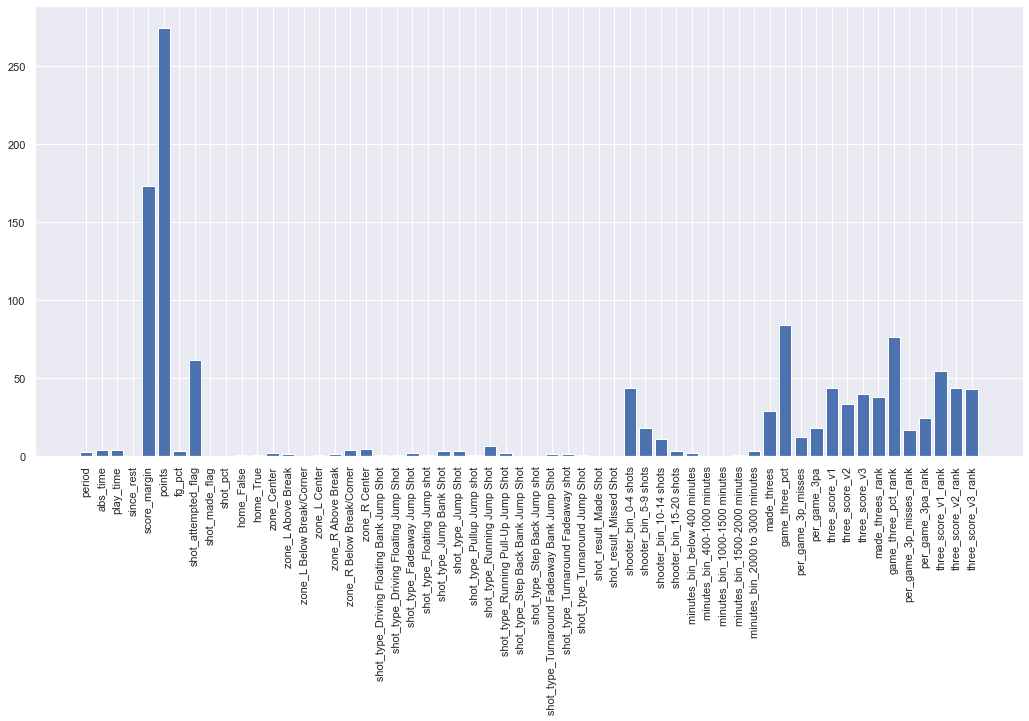

In [77]:
# using kmeans
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ['period','abs_time', 'play_time', 'since_rest', 'score_margin', 'points', 'fg_pct','shot_attempted_flag', 'shot_made_flag', 'shot_pct', 'home_False', 'home_True', 'zone_Center','zone_L Above Break', 'zone_L Below Break/Corner', 'zone_L Center','zone_R Above Break', 'zone_R Below Break/Corner', 'zone_R Center','shot_type_Driving Floating Bank Jump Shot','shot_type_Driving Floating Jump Shot', 'shot_type_Fadeaway Jump Shot','shot_type_Floating Jump shot', 'shot_type_Jump Bank Shot','shot_type_Jump Shot', 'shot_type_Pullup Jump shot','shot_type_Running Jump Shot', 'shot_type_Running Pull-Up Jump Shot','shot_type_Step Back Bank Jump Shot', 'shot_type_Step Back Jump shot','shot_type_Turnaround Fadeaway Bank Jump Shot','shot_type_Turnaround Fadeaway shot', 'shot_type_Turnaround Jump Shot','shot_result_Made Shot', 'shot_result_Missed Shot','shooter_bin_0-4 shots', 'shooter_bin_5-9 shots','shooter_bin_10-14 shots', 'shooter_bin_15-20 shots','minutes_bin_below 400 minutes', 'minutes_bin_400-1000 minutes','minutes_bin_1000-1500 minutes', 'minutes_bin_1500-2000 minutes','minutes_bin_2000 to 3000 minutes','made_threes', 'game_three_pct',
       'per_game_3p_misses', 'per_game_3pa', 'three_score_v1',
       'three_score_v2', 'three_score_v3', 'made_threes_rank',
       'game_three_pct_rank', 'per_game_3p_misses_rank', 'per_game_3pa_rank',
       'three_score_v1_rank', 'three_score_v2_rank', 'three_score_v3_rank']
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(train_scaled[predictors], train["shot_result"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [78]:
df_main

,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,seconds_remaining,...,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm
0,Shot Chart Detail,22100001,7,1628960,Grayson Allen,1610612749,Milwaukee Bucks,1,11,42,...,Left Side Center(LC),24+ ft.,26,-164,210,1,0,20211019,MIL,BKN
1,Shot Chart Detail,22100001,15,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,11,13,...,Center(C),24+ ft.,26,0,263,1,0,20211019,MIL,BKN
2,Shot Chart Detail,22100001,25,201935,James Harden,1610612751,Brooklyn Nets,1,10,16,...,Left Side Center(LC),24+ ft.,27,-213,172,1,0,20211019,MIL,BKN
3,Shot Chart Detail,22100001,27,201572,Brook Lopez,1610612749,Milwaukee Bucks,1,10,3,...,Center(C),24+ ft.,28,23,282,1,1,20211019,MIL,BKN
4,Shot Chart Detail,22100001,43,203114,Khris Middleton,1610612749,Milwaukee Bucks,1,8,52,...,Center(C),24+ ft.,26,-54,261,1,1,20211019,MIL,BKN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86530,Shot Chart Detail,22101230,656,1629638,Nickeil Alexander-Walker,1610612762,Utah Jazz,4,1,9,...,Right Side Center(RC),24+ ft.,26,89,245,1,1,20220410,POR,UTA
86531,Shot Chart Detail,22101230,657,1630314,Brandon Williams,1610612757,Portland Trail Blazers,4,0,59,...,Right Side Center(RC),24+ ft.,25,190,164,1,0,20220410,POR,UTA
86532,Shot Chart Detail,22101230,662,1627823,Juancho Hernangomez,1610612762,Utah Jazz,4,0,50,...,Left Side(L),24+ ft.,23,-228,48,1,1,20220410,POR,UTA
86533,Shot Chart Detail,22101230,670,1629638,Nickeil Alexander-Walker,1610612762,Utah Jazz,4,0,21,...,Right Side(R),24+ ft.,23,223,62,1,0,20220410,POR,UTA


In [79]:
complete_df = pd.concat([complete_df, df_merge], axis = 1)

In [80]:
# complete_df = pd.merge(encoded_df,ryans_df, on = ["player"], how = "inner")


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84164 entries, 0 to 94709
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        84164 non-null  object 
 1   player_id     84164 non-null  int64  
 2   team          84164 non-null  object 
 3   team_id       84164 non-null  int64  
 4   game_id       84164 non-null  int64  
 5   home          84164 non-null  bool   
 6   period        84164 non-null  int64  
 7   abs_time      84164 non-null  int64  
 8   play_time     84164 non-null  float64
 9   since_rest    84164 non-null  float64
 10  loc_x         84164 non-null  int64  
 11  loc_y         84164 non-null  int64  
 12  zone          84164 non-null  object 
 13  shot_type     84164 non-null  object 
 14  score_margin  84164 non-null  int64  
 15  points        84164 non-null  int64  
 16  fg_pct        84164 non-null  float64
 17  shot_result   84164 non-null  object 
dtypes: bool(1), float64(3), in

In [99]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86535 entries, 0 to 86534
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   player                                        84143 non-null  object 
 1   player_id                                     84143 non-null  float64
 2   team                                          84143 non-null  object 
 3   team_id                                       84143 non-null  float64
 4   game_id_x                                     84143 non-null  float64
 5   period                                        84143 non-null  float64
 6   abs_time                                      84143 non-null  float64
 7   play_time                                     84143 non-null  float64
 8   since_rest                                    84143 non-null  float64
 9   loc_x                                         84143 non-null 

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84164 entries, 0 to 94709
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        84164 non-null  object 
 1   player_id     84164 non-null  int64  
 2   team          84164 non-null  object 
 3   team_id       84164 non-null  int64  
 4   game_id       84164 non-null  int64  
 5   home          84164 non-null  bool   
 6   period        84164 non-null  int64  
 7   abs_time      84164 non-null  int64  
 8   play_time     84164 non-null  float64
 9   since_rest    84164 non-null  float64
 10  loc_x         84164 non-null  int64  
 11  loc_y         84164 non-null  int64  
 12  zone          84164 non-null  object 
 13  shot_type     84164 non-null  object 
 14  score_margin  84164 non-null  int64  
 15  points        84164 non-null  int64  
 16  fg_pct        84164 non-null  float64
 17  shot_result   84164 non-null  object 
dtypes: bool(1), float64(3), in